[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1G9Nyy2g2Voj6zmDfiZJge08XXVfRKCmz?usp=sharing)

## **Homework 3 - Node Centrality and Link analysis**

### **Hemalata Nayak**
### **Data 641-01, Spring 2024**
### Mar 6, 2024

**Load the OpenFlights US flight network into a NetworkX graph to answer the following questions.**


In [2]:
# Downloading the dataset
!wget https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/openflights/openflights_usa.graphml.gz -O /content/openflights_usa.graphml.gz

--2024-03-06 18:23:00--  https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/openflights/openflights_usa.graphml.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/openflights/openflights_usa.graphml.gz [following]
--2024-03-06 18:23:00--  https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/openflights/openflights_usa.graphml.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31529 (31K) [application/octet-stream]
Saving to: ‘/content/openfli

#**Q1.**

**Draw the OpenFlighs US flight network graph. Ensure the graph is legible and pretty:**



*   **Node labels are visible**
*   **Edge crossings are minimized**


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

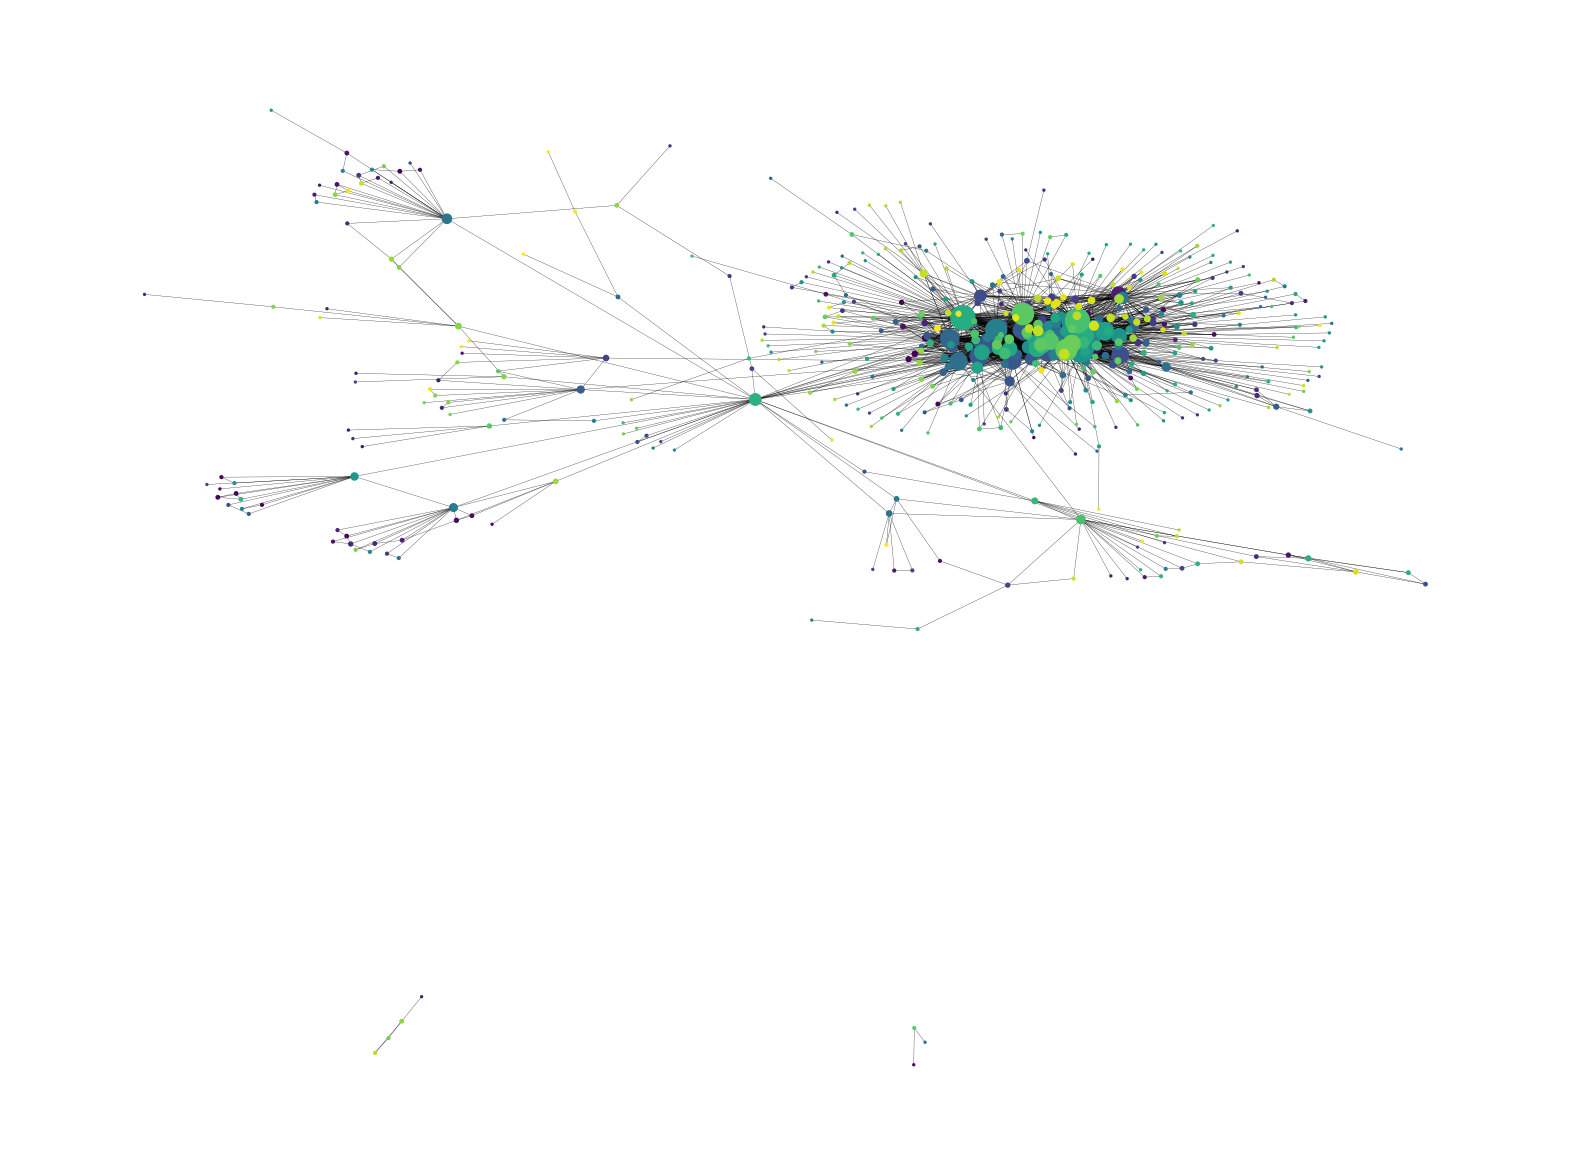

In [30]:
#load the graph
G = nx.read_graphml('openflights_usa.graphml.gz')

# Draw the graph
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, scale=0.5)  # positions for all nodes
# Calculate node sizes based on degree
node_sizes = [deg * 2 for node, deg in G.degree()]
# Defining the node colors
colors = np.linspace(0, 1, len(G.nodes))

nx.draw(G, pos, ax=ax, width=0.2, node_color=colors, node_size=node_sizes)

# Remove axis
plt.axis('off')

# Show the graph
plt.show()


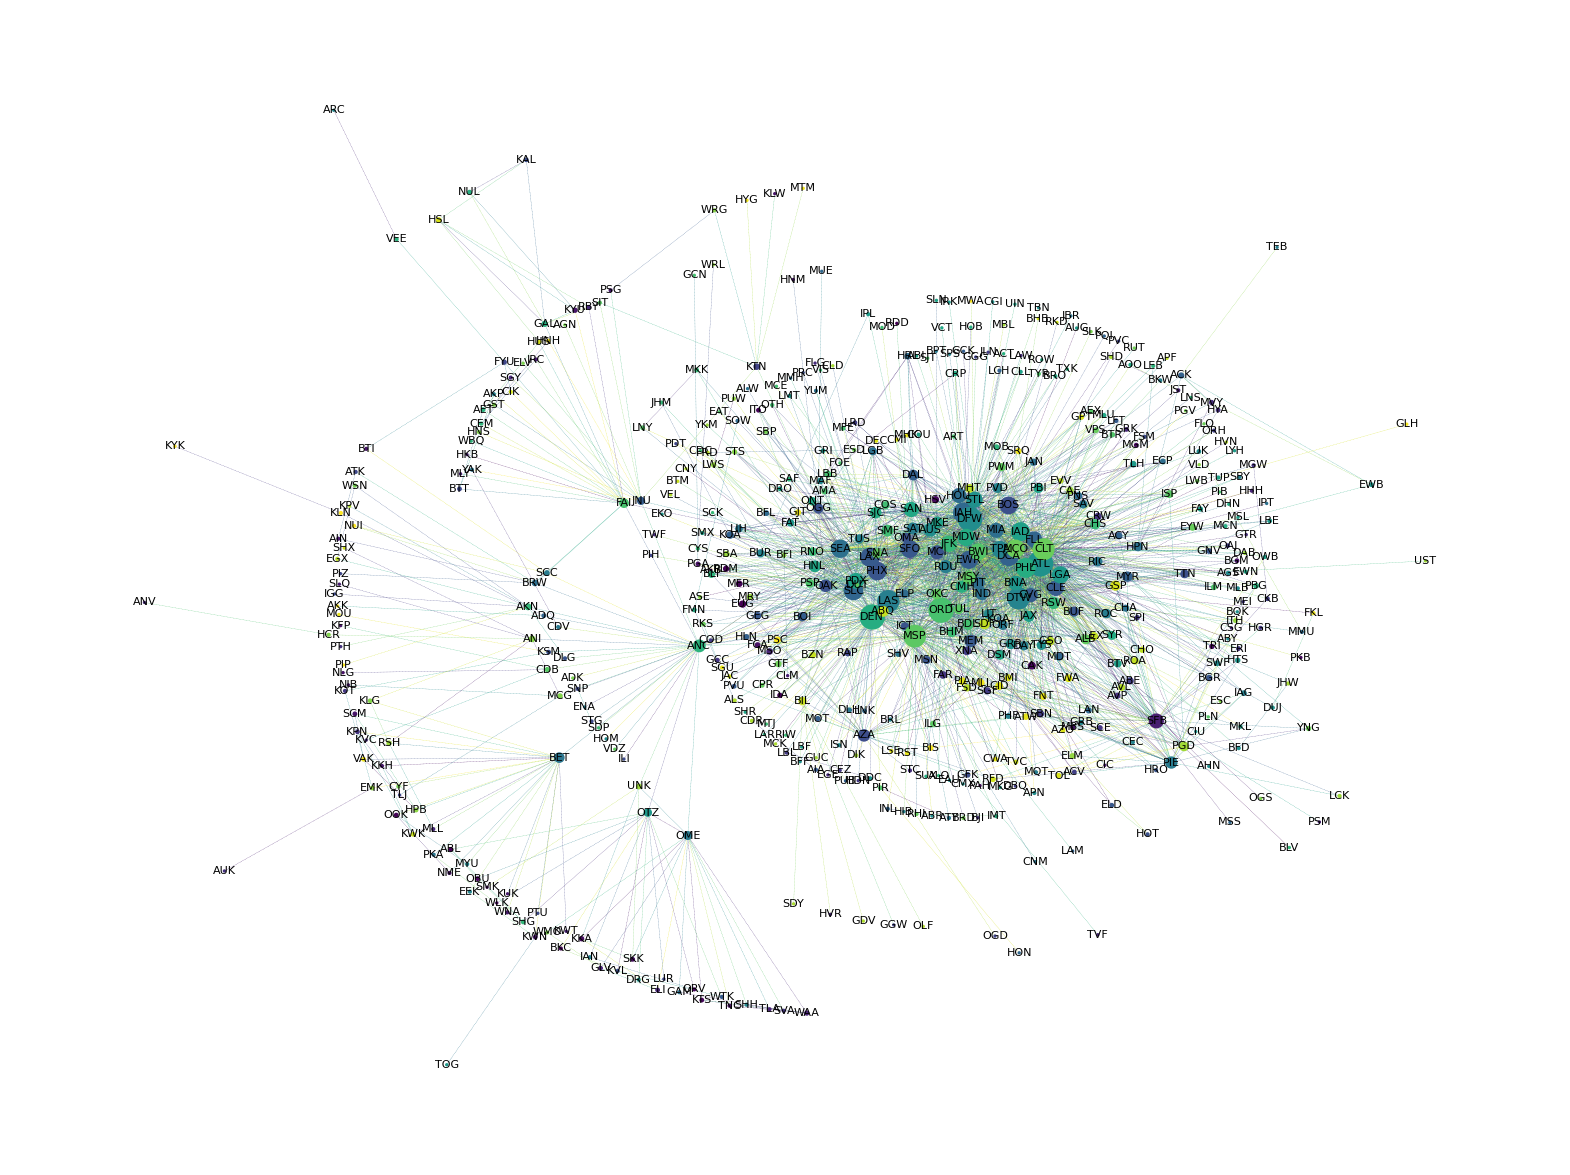

In [28]:
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.kamada_kawai_layout(G, scale=-2.0)  # positions for all nodes
# Calculate node sizes based on degree
node_sizes = [deg * 2 for node, deg in G.degree()]
# Defining the node colors
colors = np.linspace(0, 1, len(G.nodes))
edge_colors = np.random.rand(len(G.edges))
nx.draw(G, pos,ax=ax, width=0.2, with_labels=True, node_color=colors, edge_color=edge_colors, node_size=node_sizes, style='--', font_size=8)

# Remove axis
# plt.axis('off')

# Show the graph
plt.show()

#**Q2.**


*   **What is the average number of routes served by each airport in this network?**




In [ ]:
print(G.nodes)

# calculate the average number of routes served by each airport
degrees = dict(G.degree())  # This returns a dictionary with nodes as keys and their degrees as values
print(f"degrees: {degrees}")
print(degrees.values())

avg_degree = sum(degrees.values()) / float(G.number_of_nodes())
print(f"The average number of routes served by each airport in this network is: {int(avg_degree)}")


['RDD', 'EUG', 'IDA', 'MFR', 'RDM', 'OOK', 'ABL', 'BKC', 'ITO', 'OBU', 'ORV', 'WLK', 'KTS', 'CAK', 'HSV', 'PKB', 'MGM', 'TRI', 'PAH', 'KKA', 'SMK', 'SKK', 'TNC', 'AKB', 'PGA', 'FCA', 'MBS', 'BGM', 'KFP', 'NLG', 'KLW', 'KWN', 'HNM', 'KYU', 'SCM', 'BTI', 'NME', 'KKH', 'NIB', 'PSG', 'AIN', 'CIC', 'KUK', 'WNA', 'IRC', 'SFB', 'SLQ', 'JST', 'HKB', 'MLY', 'CLM', 'KWT', 'ELI', 'GLV', 'PSM', 'TLA', 'WAA', 'MSO', 'HVR', 'HHH', 'GRK', 'TVF', 'SGY', 'MLL', 'RBY', 'EGE', 'CSG', 'LAW', 'FLG', 'ANV', 'TWF', 'MVY', 'KVC', 'STC', 'GTR', 'ERI', 'HYA', 'PTH', 'AUK', 'MGW', 'CRW', 'AVP', 'BJI', 'FAR', 'KPN', 'GCC', 'SVA', 'SCE', 'HGR', 'KOT', 'MEI', 'SPI', 'CEZ', 'HDN', 'LBL', 'COD', 'SGF', 'JLN', 'ABE', 'XNA', 'SBN', 'CKB', 'LRD', 'ORH', 'ACV', 'OAJ', 'DBQ', 'GGG', 'PVC', 'KTN', 'GGW', 'OGD', 'PIH', 'PDT', 'LUR', 'PIZ', 'RAP', 'BTT', 'FYU', 'ATK', 'TLJ', 'SNP', 'IGG', 'STG', 'ILI', 'PTU', 'AZA', 'FSM', 'KAL', 'GFK', 'KSM', 'PRC', 'TTN', 'BOS', 'KVL', 'OAK', 'OMA', 'HOT', 'OGG', 'ICT', 'MCI', 'MSN', 'DLG'

**Discussion:**

To find the avergage no. of routes served by each airport in this network, first we found out the degree of each node i.e. how many routes each node have and then we calculated the average of degree by dividing the sum of degrees of each node to total number of nodes.



*   ***What are the top five airports in terms of number of routes?***

In [ ]:
highest_degree_node = max(G.nodes, key=G.degree)
print(highest_degree_node)

ATL


In [ ]:
# Sort nodes by their degree in descending order
sorted_nodes_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)

print(f"sorted_nodes_by_degree: {sorted_nodes_by_degree}")
# Select the top five
top_five_airports = sorted_nodes_by_degree[:5]
print(f"top_five-airports: {top_five_airports}")

top_five_airports_info = "The top five airports are:\n"
for i in range(5):
  airport_name = G.nodes[top_five_airports[i][0]]['name']
  top_five_airports_info += f"{i+1}. {airport_name}\n"

print(top_five_airports_info)

sorted_nodes_by_degree: [('ATL', 153), ('ORD', 149), ('DEN', 148), ('DFW', 138), ('MSP', 117), ('DTW', 114), ('LAS', 113), ('CLT', 110), ('IAH', 101), ('PHL', 88), ('LAX', 85), ('DCA', 85), ('SLC', 85), ('IAD', 81), ('PHX', 77), ('SEA', 75), ('MCO', 74), ('EWR', 72), ('SFO', 71), ('BOS', 70), ('MDW', 66), ('LGA', 65), ('TPA', 63), ('BWI', 63), ('FLL', 58), ('JFK', 57), ('STL', 56), ('PDX', 54), ('CLE', 53), ('SAN', 50), ('MIA', 49), ('SFB', 48), ('HOU', 48), ('BNA', 46), ('CVG', 43), ('MCI', 41), ('AUS', 39), ('MSY', 38), ('RDU', 36), ('ANC', 34), ('OAK', 33), ('PIT', 33), ('AZA', 32), ('MEM', 32), ('IND', 32), ('PIE', 31), ('CMH', 31), ('RSW', 31), ('SAT', 30), ('MKE', 28), ('HNL', 28), ('SMF', 28), ('SJC', 27), ('JAX', 24), ('DAL', 23), ('BDL', 23), ('SDF', 23), ('ABQ', 23), ('BET', 22), ('OKC', 22), ('MYR', 21), ('OMA', 20), ('OGG', 20), ('BUF', 20), ('GRR', 20), ('CHS', 20), ('GSP', 20), ('ORF', 19), ('PVD', 19), ('PBI', 19), ('BHM', 19), ('ALB', 19), ('RIC', 18), ('FAI', 18), ('TU

**Discussion:**

To find the top five airports, at first, we sorted the nodes according to their degrees and then considered the first five.

* ***How many airports in this network serve only a single route?***

In [ ]:
airports_with_single_route=[]
degrees = dict(G.degree())

for airport,degree in degrees.items():
  if degree == 1:
    airports_with_single_route.append(airport)

print(airports_with_single_route)
print(G.degree(airports_with_single_route))
print(f"{len(airports_with_single_route)} airports in this network serve only single route.")

['RDD', 'WLK', 'PKB', 'PAH', 'SMK', 'AKB', 'KFP', 'NLG', 'KLW', 'HNM', 'NIB', 'CIC', 'KUK', 'SLQ', 'HKB', 'MLY', 'CLM', 'KWT', 'PSM', 'HVR', 'TVF', 'EGE', 'CSG', 'LAW', 'FLG', 'ANV', 'TWF', 'KVC', 'GTR', 'PTH', 'AUK', 'BJI', 'MEI', 'CEZ', 'HDN', 'JLN', 'DBQ', 'GGG', 'PVC', 'GGW', 'OGD', 'PIH', 'PDT', 'LUR', 'PIZ', 'TLJ', 'IGG', 'ILI', 'PTU', 'PRC', 'GCK', 'LAM', 'PUB', 'PQI', 'HON', 'MUE', 'MSS', 'MMH', 'IPT', 'KQA', 'JBR', 'ALW', 'CNM', 'BPT', 'TEB', 'ENA', 'SPS', 'HIB', 'ARC', 'HOM', 'TBN', 'ABR', 'ABY', 'AHN', 'BFF', 'BQK', 'CGI', 'CIU', 'CMX', 'EAU', 'EKO', 'TOG', 'IRK', 'LBF', 'AUG', 'LYH', 'MKG', 'MSL', 'ABI', 'SHR', 'SLN', 'UIN', 'VCT', 'ROW', 'DHN', 'HOB', 'SUX', 'LAR', 'ACT', 'TXK', 'WBQ', 'LNS', 'ALO', 'BLV', 'SCK', 'MTJ', 'RIW', 'VIS', 'MOD', 'SDP', 'MCE', 'CDC', 'GCN', 'PIB', 'SJT', 'FOE', 'EAT', 'PLN', 'VDZ', 'FLO', 'RUT', 'PGV', 'AGN', 'SLK', 'ELV', 'ADK', 'OGS', 'ESC', 'VLD', 'WRL', 'YKM', 'UST', 'GUC', 'MBL', 'CLD', 'SDY', 'KPV', 'MCK', 'GDV', 'OLF', 'CNY', 'VEL', 'HVN'

**Discussion:**

To find the airport that serve only a single route, we need to find the nodes with degree 1.

* ***Which airport has the highest closeness centrality?***

In [ ]:
#help(closeness)
closeness = nx.centrality.closeness_centrality(G)
print(closeness)
#print(max(closeness))
max_closeness_node = max(closeness, key=closeness.get)
max_closeness_value = closeness[max_closeness_node]

print(f"{G.nodes[max_closeness_node]['name']} has the highest closeness centrality...i.e : {max_closeness_value}")

{'RDD': 0.2993742436622778, 'EUG': 0.356675559608382, 'IDA': 0.342197105835619, 'MFR': 0.35524408579055566, 'RDM': 0.3510177847038207, 'OOK': 0.23762412002545003, 'ABL': 0.23635509935775736, 'BKC': 0.2362499591890039, 'ITO': 0.3207064663386961, 'OBU': 0.23635509935775736, 'ORV': 0.2362499591890039, 'WLK': 0.23614491251973355, 'KTS': 0.23667108211090943, 'CAK': 0.368300907251651, 'HSV': 0.37113201136050367, 'PKB': 0.28800971163605243, 'MGM': 0.3244287771880762, 'TRI': 0.3216777154796371, 'PAH': 0.33297172931465874, 'KKA': 0.23688220707264976, 'SMK': 0.23426991983100165, 'SKK': 0.23677659752870298, 'TNC': 0.2365656606934881, 'AKB': 0.0024464831804281344, 'PGA': 0.335707906609912, 'FCA': 0.355481866303133, 'MBS': 0.35078593676148, 'BGM': 0.31240582838640046, 'KFP': 0.23313867790029882, 'NLG': 0.23313867790029882, 'KLW': 0.2454204751649172, 'KWN': 0.23773048713378728, 'HNM': 0.27361664516068046, 'KYU': 0.260721604446186, 'SCM': 0.23762412002545003, 'BTI': 0.23614491251973355, 'NME': 0.2375

* ***Which airport has the highest betweenness centrality?***

In [ ]:
betweenness = nx.centrality.betweenness_centrality(G)
print(betweenness)
# print(max(betweenness))
# print(max(betweenness.values()))
# nodes_with_max_betweenness = [node for node, centrality in betweenness.items() if centrality == max_betweenness]
# print("Node(s) with maximum betweenness centrality:")
# for node in nodes_with_max_betweenness:
#     print(f"Node ID: {G.nodes[node]['name']}, Centrality Value: {max_betweenness}")

max_betweenness_node = max(betweenness, key=betweenness.get)
max_betweenness_value = betweenness[max_betweenness_node]

print(f"{G.nodes[max_betweenness_node]['name']} has the highest betweenness centrality...i.e : {max_betweenness_value}")

{'RDD': 0.0, 'EUG': 0.00015449705612201548, 'IDA': 3.707474661405287e-05, 'MFR': 0.0, 'RDM': 0.0, 'OOK': 3.3729087965461415e-06, 'ABL': 0.0, 'BKC': 0.0, 'ITO': 0.0, 'OBU': 0.0, 'ORV': 0.0, 'WLK': 0.0, 'KTS': 3.3729087965461415e-06, 'CAK': 1.1433589140834378e-07, 'HSV': 1.0239646842298738e-06, 'PKB': 0.0, 'MGM': 0.0, 'TRI': 7.195378353452286e-05, 'PAH': 0.0, 'KKA': 1.0118726389638425e-05, 'SMK': 0.0, 'SKK': 0.0, 'TNC': 0.0, 'AKB': 0.0, 'PGA': 0.003622504047490556, 'FCA': 0.0, 'MBS': 0.0, 'BGM': 0.0, 'KFP': 0.0, 'NLG': 0.0, 'KLW': 0.0, 'KWN': 0.003622504047490556, 'HNM': 0.0, 'KYU': 0.0026945044072674944, 'SCM': 0.0, 'BTI': 1.6864543982730704e-05, 'NME': 0.0, 'KKH': 0.0, 'NIB': 0.0, 'PSG': 0.0002367781975175388, 'AIN': 0.0, 'CIC': 0.0, 'KUK': 0.0, 'WNA': 0.0, 'IRC': 0.0, 'SFB': 0.01347034807233179, 'SLQ': 0.0, 'JST': 0.0, 'HKB': 0.0, 'MLY': 0.0, 'CLM': 0.0, 'KWT': 0.0, 'ELI': 3.3729087965461415e-06, 'GLV': 3.3729087965461415e-06, 'PSM': 0.0, 'TLA': 0.0, 'WAA': 1.0118726389638425e-05, 'MS

* ***Compute the heterogeneity parameter of this network.***

The heterogeneity parameter says how broad the distribution is. It is the ratio of average of square of degrees of each node in a network to square of average of degree.It is given by,

> > >  $\kappa={\frac{\left\langle k^{2}\right\rangle}{\left\langle k\right\rangle^{2}}}$












In [ ]:
# !pip install pix2tex
# from PIL import Image
# from pix2tex.cli import LatexOCR

# img = Image.open('/content/pix.png')
# model = LatexOCR()
# print(model(img))

In [ ]:
# Calculate the mean degree <k> and mean squared degree <k^2>
degrees=[]
for node, deg in G.degree():
  degrees.append(deg)

print(degrees)
print(sum(degrees))
print(len(degrees))
mean_degree = sum(degrees) / len(degrees)

print("mean_degree: ", mean_degree)
msd =[]
for i in degrees:
  msd.append(i**2)

print("msd", msd)
mean_squared_degree = sum(msd)/len(degrees)
print("mean_squared_degree :", mean_squared_degree)

# Calculate the heterogeneity parameter kappa
kappa = mean_squared_degree / (mean_degree**2)

print(mean_degree**2)
print(f"Heterogeneity parameter (kappa): {kappa}")

[1, 9, 4, 7, 6, 3, 3, 2, 3, 3, 2, 1, 3, 11, 9, 1, 3, 4, 1, 4, 1, 3, 2, 1, 3, 5, 4, 3, 1, 1, 1, 3, 1, 4, 3, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 48, 1, 2, 1, 1, 1, 1, 3, 3, 1, 2, 4, 7, 1, 2, 3, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 3, 3, 1, 1, 2, 9, 6, 1, 10, 3, 3, 2, 4, 2, 2, 1, 4, 1, 1, 2, 2, 9, 1, 9, 14, 9, 3, 3, 2, 3, 3, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 7, 3, 4, 2, 1, 2, 1, 2, 1, 1, 32, 2, 3, 5, 3, 1, 14, 70, 2, 33, 20, 2, 20, 12, 41, 11, 2, 2, 77, 6, 20, 10, 71, 5, 32, 3, 3, 85, 53, 2, 43, 2, 12, 3, 72, 16, 1, 4, 23, 5, 2, 10, 21, 6, 85, 1, 9, 1, 1, 3, 58, 2, 85, 1, 11, 3, 6, 1, 1, 101, 2, 5, 13, 7, 2, 11, 48, 33, 7, 5, 1, 49, 75, 8, 9, 2, 12, 1, 32, 1, 16, 1, 1, 2, 1, 4, 22, 2, 10, 2, 2, 18, 5, 2, 19, 1, 13, 15, 31, 2, 5, 30, 17, 1, 2, 36, 16, 1, 113, 5, 2, 5, 16, 2, 2, 19, 2, 2, 12, 114, 63, 2, 2, 1, 1, 2, 7, 4, 3, 1, 3, 2, 17, 5, 1, 1, 1, 1, 1, 138, 2, 2, 39, 2, 1, 17, 1, 56, 20, 1, 1, 153, 2, 1, 2, 2, 1, 1, 3, 46, 10, 3, 13, 4, 1, 1, 65, 7, 3, 1, 1, 2, 2, 2, 1, 1, 1, 4, 2, 10, 24, 3,

Discussion:

The heterogeneity parameter is more than 1...that means the network is more heterogeneous.

**# Q3. Draw a network in which one node has a very high value of PageRank, although the same node has low closeness and betweenness centrality (don't forget to point out the node). Use a program to validate your results.**

## Answer:

One strategy is to ensure that node 1 has a lot of incoming edges (which benefits PageRank) but is not on the shortest paths between many other nodes (which would reduce its betweenness centrality) and is further away from other nodes on average (which reduces its closeness centrality).

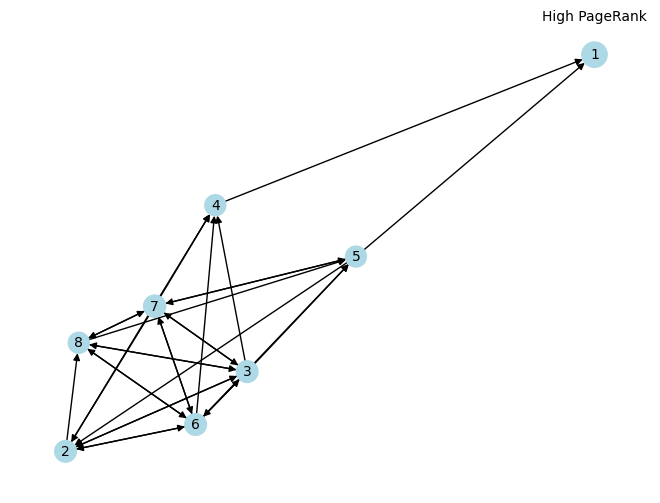

PageRank: {1: 0.1658679190659308, 2: 0.12097698346546133, 3: 0.12170904315997942, 4: 0.11459895354916501, 5: 0.1132435388530933, 6: 0.12170904315997942, 7: 0.12729556519722562, 8: 0.11459895354916501}
Closeness Centrality: {1: 0.5833333333333334, 2: 0.5952380952380952, 3: 0.5952380952380952, 4: 0.6428571428571428, 5: 0.5952380952380952, 6: 0.5952380952380952, 7: 0.5952380952380952, 8: 0.5952380952380952}
Betweenness Centrality: {1: 0.0, 2: 0.047619047619047616, 3: 0.02976190476190476, 4: 0.05952380952380952, 5: 0.06547619047619047, 6: 0.02976190476190476, 7: 0.0615079365079365, 8: 0.015873015873015872}
Node with the lowest closeness centrality: 1
Node with the lowest betweenness centrality: 1
Node with the highest PageRank: 1


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])

# Add edges
G.add_edges_from([(2, 4), (3, 2), (4,1), (5,1), (6,3),(7,5), (7,6), (3,4), (3,7), (5,2), (3,5), (7,2), (7,3), (6,7), (3,6),(2,3),(2,6),(6,2),(5,7),(6,5),(7,8), (6,8),(3,8), (7,4),(8,3),(8,5),(6,4),(8,6),(8,7),(2,8)])



# Compute PageRank
pr = nx.pagerank(G)


# Compute centrality measures
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)

lowest_closeness_node = min(closeness, key=closeness.get)
lowest_betweenness_node = min(betweenness, key=betweenness.get)
# Draw the network
pos = nx.spring_layout(G)
# Calculate node sizes based on PageRank
node_sizes = [2000 * pr[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='lightblue', font_size=10)

# Annotate the node with high PageRank
plt.text(pos[1][0], pos[1][1]+0.1, "High PageRank", horizontalalignment='center')

plt.show()

print("PageRank:", pr)
print("Closeness Centrality:", closeness)
print("Betweenness Centrality:", betweenness)
print(f"Node with the lowest closeness centrality: {lowest_closeness_node}")
print(f"Node with the lowest betweenness centrality: {lowest_betweenness_node}")

highest_pagerank_node = max(pr, key=pr.get)
print(f"Node with the highest PageRank: {highest_pagerank_node}")

**#Q4.The damping factor (d) in PageRank controls how of often (probability) the random surfer follows one of the outlinks of the current page (node) vs. going to a random page (node) on the network. (a) What does d = 0 mean? What would happen to the PageRank values in that case? Why? (b) What does d = 1 mean? Can you explain a possible problem with using that value?**

##Answer

**a)** When the damping factor ***d*** is set to 0, it means that the random surfer always chooses to jump to a random page rather than following any of the outlinks from the current page.

 In this case, the PageRank values would be equal for all pages in the network. This is because the random surfer never follows any links, so every page has an equal probability of being visited. Pagerank only depends on teleportation in this case.

**b)** When the damping factor ***d*** is set to 1, it means that the random surfer always follows one of the outlinks from the current page and never jumps to a random page. In this case the random surfer can get stuck, never reaching other parts of the network.

**##References:**

1) [nx.draw documentation](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html)

2) [Drwaing basics](https://networkx.guide/visualization/basics/)

3) [Centrality](https://bookdown.org/markhoff/social_network_analysis/centrality.html)